# **Praktikum II & III Machine Learning**

**Pertemuan II: Decision Tree and Regression Tree**

**Pertemuan III: K-Nearest Neighbors (KNN)**

Nama  : Nurul Azizah

NPM : F1F022029

# Latar Belakang

<p align="justify">
Perkembangan teknologi komputasi telah mendorong munculnya machine learning sebagai pendekatan yang mampu memproses data dalam jumlah besar dan menghasilkan pola yang bermanfaat. Konsep ini berfokus pada bagaimana sistem dapat belajar dari data untuk membuat prediksi maupun klasifikasi tanpa harus diprogram secara eksplisit. Berbagai algoritma digunakan untuk membangun model yang mampu menyesuaikan diri terhadap karakteristik data, sehingga menghasilkan keputusan yang lebih akurat dan efisien. Pada konteks machine learning, terdapat berbagai algoritma dan teknik yang digunakan untuk mengolah dan memahami data, membangun model, serta membuat prediksi atau keputusan. Machine Learning dapat diterapkan dalam berbagai bidang seperti pengenalan wajah, pengenalan suara, analisis data, pengenalan pola, dan masih banyak lagi (Ramadhon dkk., 2024).
<p align="justify">
Regression Tree merupakan algoritma supervised learning yang digunakan untuk tugas regresi, di mana variabel respon berbentuk kontinu. Algoritma ini membangun model prediktif dengan struktur menyerupai pohon keputusan, di mana setiap percabangan mewakili kondisi dari fitur, dan setiap daun menggambarkan nilai prediksi akhir. Proses pembentukan pohon melibatkan pemilihan atribut yang paling relevan, evaluasi model menggunakan metrik seperti Mean Squared Error (MSE) atau R-squared, serta interpretasi hasil melalui visualisasi pohon yang memudahkan analisis (Prasetya, 2020). Regression Tree efektif untuk menangani data non-linear dan memberikan wawasan tentang interaksi antar fitur. Sementara itu, K-Nearest Neighbors (KNN) adalah algoritma supervised learning yang dapat digunakan untuk regresi, di mana prediksi dilakukan berdasarkan rata-rata nilai dari k tetangga terdekat dalam ruang fitur. Algoritma ini sederhana dan non-parametrik, tidak memerlukan asumsi distribusi data, sehingga cocok untuk dataset dengan pola kompleks. Evaluasi KNN melibatkan metrik seperti MSE atau Mean Absolute Error (MAE), dan pemilihan nilai k yang optimal untuk menghindari overfitting atau underfitting (Sari & Nugroho, 2021). KNN sering digunakan dalam aplikasi seperti rekomendasi sistem dan analisis prediktif karena kemampuannya menangani data bising.
<p align="justify">
Implementasi Regression Tree dan KNN banyak dilakukan menggunakan bahasa pemrograman Python dengan pustaka seperti scikit-learn (Modul Praktikum, 2025). Analisis ini tidak hanya berhenti pada penerapan algoritma, tetapi juga mencakup evaluasi performa model agar dapat diketahui tingkat keandalannya. Visualisasi hasil membantu memahami alur prediksi, sementara penggunaan dataset lain memberi kesempatan untuk melatih kemampuan analisis lebih lanjut. Dengan cara ini, penerapan kedua algoritma tidak hanya menghasilkan model prediktif, tetapi juga memberikan wawasan mengenai pola data yang sedang diteliti.
</p>

# Rumusan Masalah

Berdasarkan latar belakang, rumusan masalah yang dapat disimpulkan adalah:
1. Apa konsep dasar algoritma Regression Tree dan K-Nearest Neighbors (KNN)?
2. Bagaimana cara engimplementasikan Regression Tree dan KNN menggunakan pustaka Scikit-learn di Python?
3. Bagaimana cara mengevaluasi performa model Regression Tree dan KNN menggunakan *accuracy score* dan *confusion matrix*?

# Tujuan Penelitian

Berdasarkan rumusan masalah di atas, tujuan yang dapat disimpulkan adalah:
1. Dapat memahami konsep dasar algoritma Regression Tree dan K-Nearest Neighbors (KNN).
2. Dapat mengimplementasikan Regression Tree dan KNN menggunakan pustaka Scikit-learn di Python.
3. Dapat mengevaluasi performa model Regression Tree dan KNN menggunakan accuracy score dan confusion matrix.

# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [181]:
!pip install feature_engine

In [182]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,  OrdinalEncoder, LabelEncoder,  StandardScaler, RobustScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay, confusion_matrix, classification_report, f1_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Memuat Data

Dataset yang digunakan dalam praktikum ini adalah "BMW sales data (2010-2024)", yang dapat diakses melalui tautan berikut:

https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv.

Dataset ini akan digunakan untuk memprediksi volume penjualan mobil BMW dengan membangun dan mengevaluasi dua model regresi yaitu Regression Tree dan K-Nearest Neighbors (KNN). Sehingga nanti akan dibandingkan kinerja kedua model tersebut dan memberikan kesimpulan model mana yang lebih baik untuk dataset ini.

In [183]:
# Load penelitian Dataset
bmw_df = pd.read_csv(' https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv', sep=';')
bmw_df.head(10)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411


In [184]:
# Melihat dimensi data
bmw_df.shape

(50000, 10)

In [185]:
# Melihat tipe data
bmw_df.dtypes

,0
Model,object
Year,int64
Region,object
Color,object
Fuel_Type,object
Transmission,object
Engine_Size_L,float64
Mileage_KM,int64
Price_USD,int64
Sales_Volume,int64


In [186]:
# Check Missing Values
bmw_df.isnull().sum()

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


# Analisis Data Eksploratif

In [187]:
bmw_df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


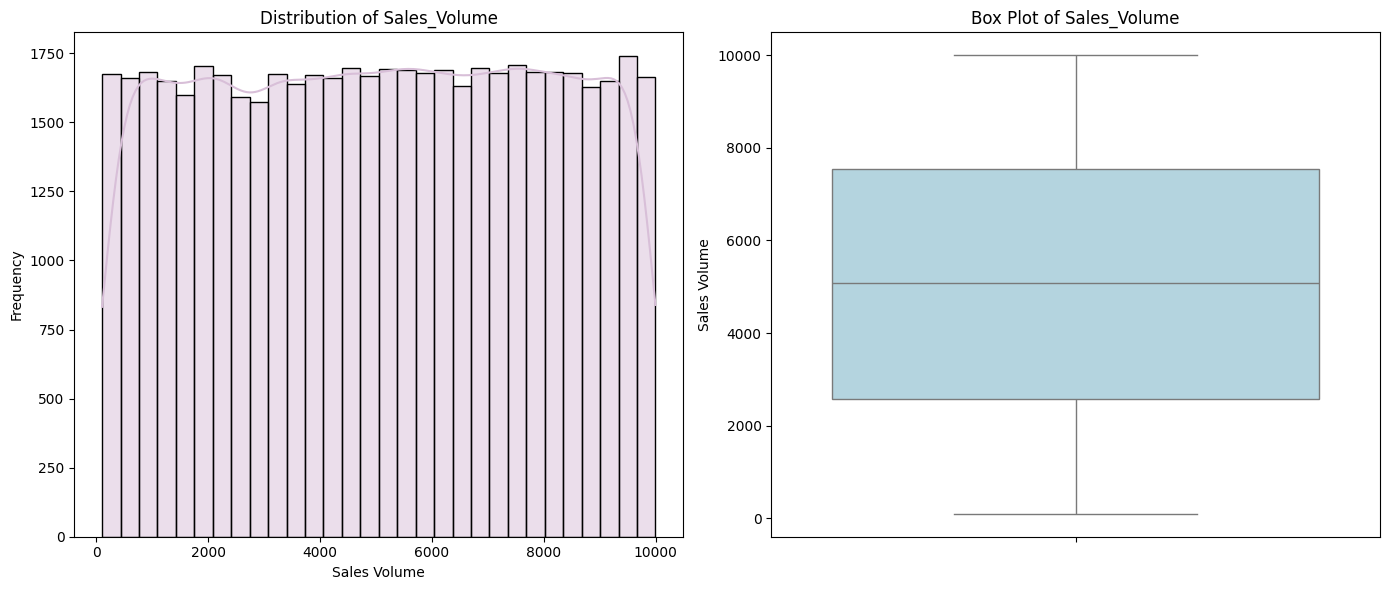

In [188]:
# Set up the figure and axes for subplots
plt.figure(figsize=(14, 6))

# Histogram for Sales_Volume
plt.subplot(1, 2, 1)
sns.histplot(bmw_df['Sales_Volume'], kde=True, bins=30, color='thistle')
plt.title('Distribution of Sales_Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Frequency')

# Box plot for Sales_Volume
plt.subplot(1, 2, 2)
sns.boxplot(y=bmw_df['Sales_Volume'], color='lightblue')
plt.title('Box Plot of Sales_Volume')
plt.ylabel('Sales Volume')

plt.tight_layout()
plt.show()

<div align="justify">
Histogram menunjukkan bahwa distribusi Sales Volume tersebar merata di seluruh rentang nilai, tanpa adanya konsentrasi khusus pada interval tertentu. Frekuensi tiap kelompok volume relatif seimbang, menandakan tidak ada puncak dominan dalam data. Sementara itu, boxplot memperlihatkan nilai tengah berada di sekitar 5000, dengan rentang antar kuartil mulai dari sekitar 1000 hingga 10000. Tidak tampaknya outlier dalam visualisasi ini mengindikasikan bahwa data Sales Volume memiliki sebaran yang cukup seragam dan tidak menunjukkan adanya nilai ekstrem yang menyimpang.
</div>

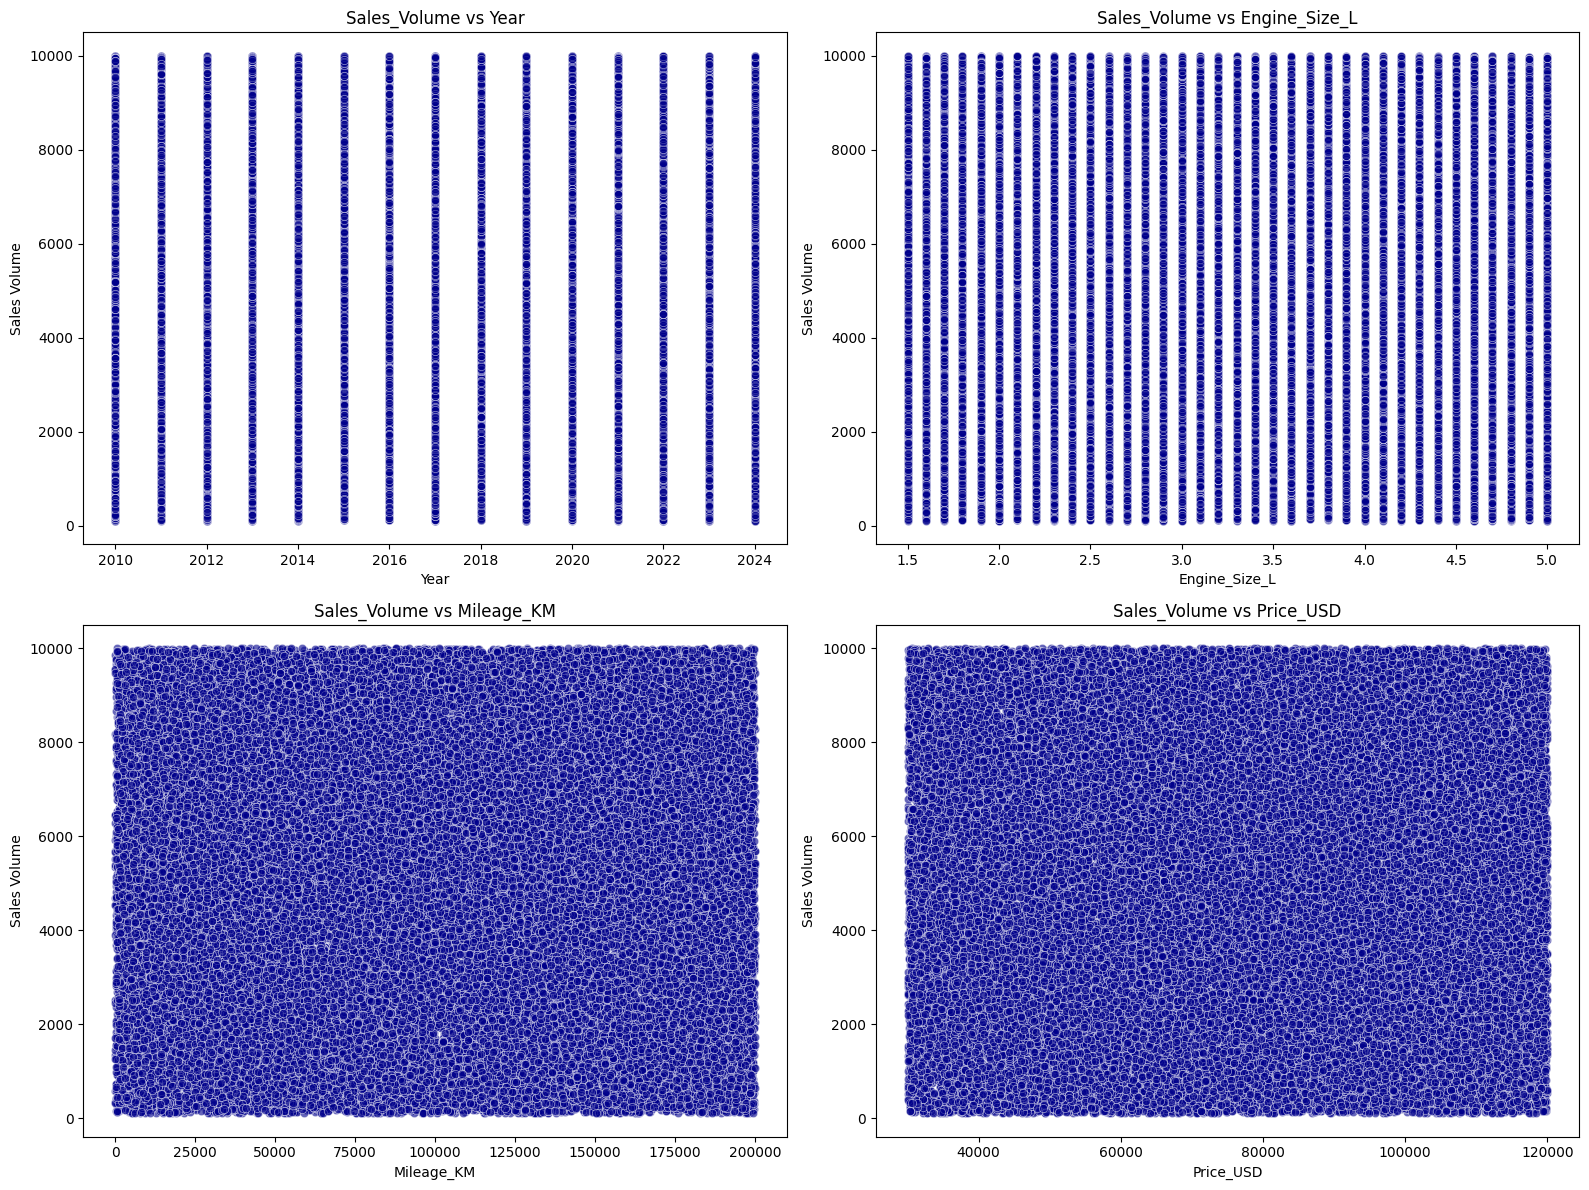

In [189]:
numerical_features = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=bmw_df[feature], y=bmw_df['Sales_Volume'], color='darkblue', alpha=0.6)
    plt.title(f'Sales_Volume vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sales Volume')
plt.tight_layout()
plt.show()

<div align="justify">
Keempat scatter plot memperlihatkan bahwa Sales Volume tidak menunjukkan pola hubungan yang konsisten terhadap variabel Year, Engine Size, Mileage, maupun Price. Titik-titik data pada masing-masing grafik tersebar secara merata di sepanjang rentang nilai, tanpa indikasi adanya tren meningkat, menurun, pola linear, ataupun hubungan nonlinear. Sebaran yang acak ini mengisyaratkan bahwa variasi tahun produksi kendaraan, kapasitas mesin, jarak tempuh, serta harga tidak memberikan pengaruh signifikan terhadap fluktuasi Sales Volume dalam dataset ini.
</div>

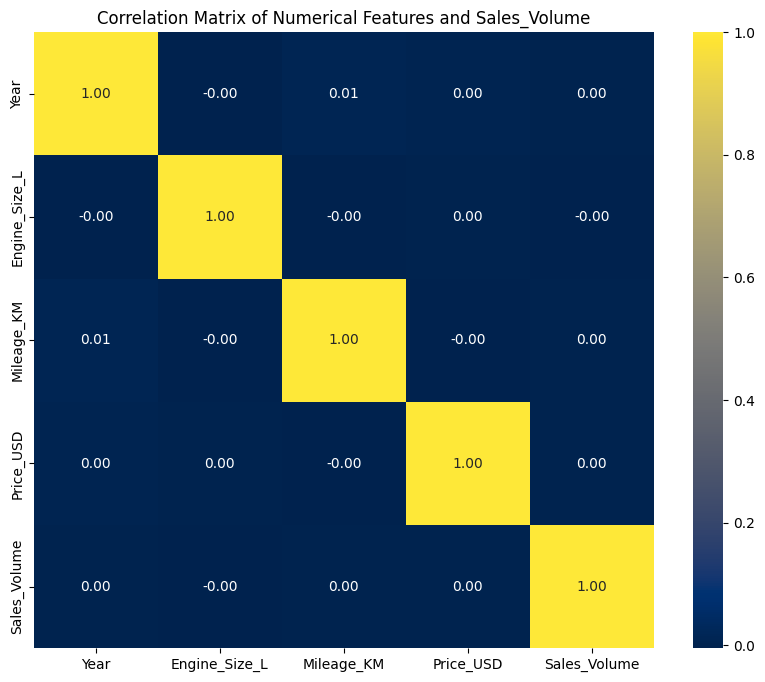

In [190]:
numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
correlation_matrix = bmw_df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features and Sales_Volume')
plt.show()

<div align="justify">
Heatmap korelasi tersebut memperlihatkan bahwa tidak terdapat hubungan linear yang signifikan antara Sales Volume dengan variabel numerik lainnya seperti Year, Engine Size, Mileage, maupun Price. Dapat dilihat dari nilai korelasi yang sangat mendekati nol, menunjukkan bahwa perubahan pada masing-masing variabel tersebut tidak berkorelasi secara langsung dengan peningkatan atau penurunan volume penjualan. Selain itu, hubungan antar fitur numerik lainnya juga menunjukkan korelasi yang lemah, sehingga tidak ada pola keterkaitan yang kuat di antara mereka. Secara keseluruhan, visualisasi ini mengindikasikan bahwa variabel-variabel numerik dalam dataset tidak memiliki pengaruh linear yang berarti terhadap variasi Sales Volume.
</div>

# _Feature Engineering_

## A - Missing Value

**Data hilang (missing data)** atau nilai hilang (missing values) terjadi ketika tidak ada data atau nilai yang tersimpan untuk suatu observasi pada variabel tertentu. Kehilangan data adalah hal yang sering terjadi, baik dalam kompetisi data science maupun di dunia bisnis, dan dapat mempengaruhi kesimpulan yang diambil dari data tersebut. Data yang tidak lengkap merupakan masalah yang tidak bisa dihindari saat bekerja dengan berbagai sumber data. **Pada dataset ini tidak terdapat Missing Value.**

## B - Kardinalitas

## C - Splitting Data

In [191]:
#mendeskripsikan variabel X dan y
X = bmw_df.drop('Sales_Volume', axis = 1)
y = bmw_df['Sales_Volume']

In [192]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=200)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (37500, 9)
Test size  :  (12500, 9)


## D- Handling Outlier

## E- Scaling

In [193]:
# Identify numerical features directly from X_train
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()

# Initialize lists to store feature names based on skewness
nilai_skew = []
nilai_skew_normal = []

# Calculate skewness for each numerical feature in X_train
print("Calculating skewness for numerical features in X_train:")
for feature in numerical_features:
    skewness = X_train[feature].skew()
    print(f"  {feature}: {skewness:.4f}")
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(feature)
    else:
        nilai_skew.append(feature)

# Display the categorized features
print('\nKolom yang mempunyai nilai skewness sedang (skewed):', nilai_skew)
print('Kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

Calculating skewness for numerical features in X_train:
  Year: -0.0108
  Engine_Size_L: -0.0075
  Mileage_KM: -0.0079
  Price_USD: 0.0075

Kolom yang mempunyai nilai skewness sedang (skewed): []
Kolom yang mempunyai nilai skewness normal: ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']


In [194]:
numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']
scaler = StandardScaler()

# Apply fit_transform to X_train for numerical columns
X_train_scaled = X_train.copy() # Create a copy to avoid modifying original X_train directly if not intended
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Apply transform to X_test for numerical columns
X_test_scaled = X_test.copy() # Create a copy to avoid modifying original X_test directly if not intended
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical features in X_train and X_test have been scaled using StandardScaler.")
print("X_train_scaled head:\n", X_train_scaled[numerical_cols].head())
print("X_test_scaled head:\n", X_test_scaled[numerical_cols].head())

Numerical features in X_train and X_test have been scaled using StandardScaler.
X_train_scaled head:
            Year  Engine_Size_L  Mileage_KM  Price_USD
28475 -0.473404       0.545830    1.243500  -1.039395
10801 -1.166587       0.545830    1.507087  -0.504411
10124 -1.397648      -0.246990   -1.310046   0.076110
4822  -1.166587      -0.346092    1.436374   1.015719
21632 -0.473404      -0.841605    0.712481   0.823966
X_test_scaled head:
            Year  Engine_Size_L  Mileage_KM  Price_USD
20518  0.681901       0.744035   -1.218395  -1.583478
20570 -0.704465       1.437753   -1.325379   0.458581
38530  1.375084      -0.048785   -1.577341   0.601264
39945 -0.242343       0.644933    0.781107  -0.668212
1713  -0.242343      -0.643400   -1.340367  -1.698745


## F- Encoding

## G- Balancing Data

# _Training Model_

In [195]:
# Initialize and train the DecisionTreeRegressor model
reg_tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
reg_tree_model.fit(X_train_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']], y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [196]:
# Initialize and train the KNeighborsRegressor model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']], y_train)

KNeighborsRegressor()

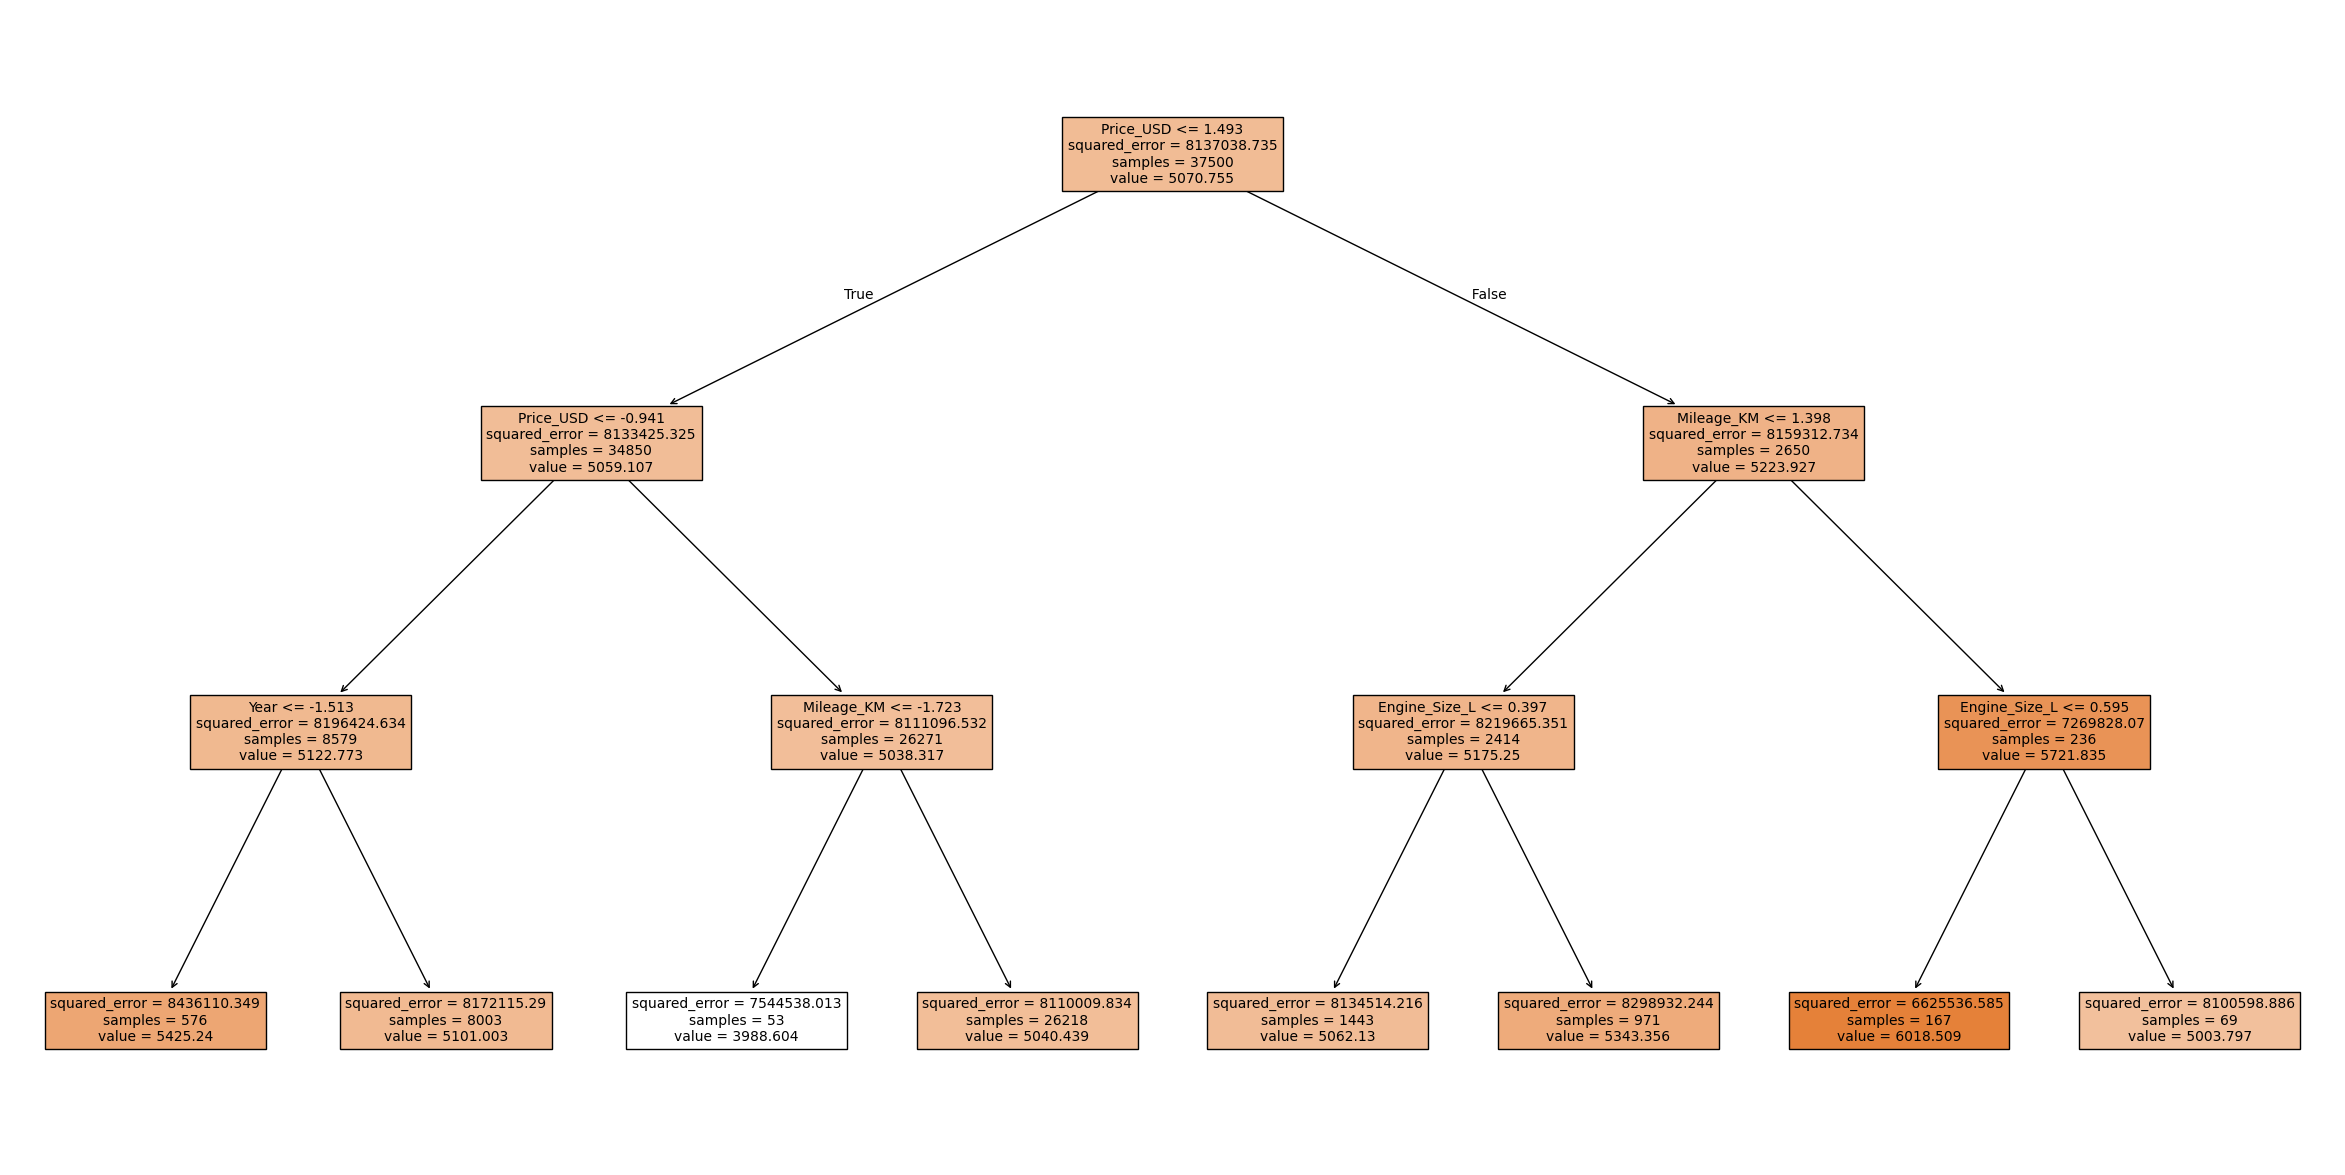

In [197]:
plt.figure(figsize=(30,15))

# Define the feature names explicitly for plotting
feature_names_for_plot = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']

tree.plot_tree(reg_tree_model, feature_names=feature_names_for_plot, filled=True, fontsize= 10)
plt.show()

# _Model Performance_

In [198]:
# Make predictions on the test set
y_pred_reg_tree = reg_tree_model.predict(X_test_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']])

# Calculate evaluation metrics
mae_reg_tree = mean_absolute_error(y_test, y_pred_reg_tree)
mse_reg_tree = mean_squared_error(y_test, y_pred_reg_tree)
rmse_reg_tree = np.sqrt(mse_reg_tree)

print("Regression Tree Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_reg_tree:.2f}")
print(f"Mean Squared Error (MSE): {mse_reg_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_reg_tree:.2f}")

Regression Tree Model Performance:
Mean Absolute Error (MAE): 2484.45
Mean Squared Error (MSE): 8251014.32
Root Mean Squared Error (RMSE): 2872.46


In [199]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']])

# Calculate evaluation metrics
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print("K-Nearest Neighbors Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")

K-Nearest Neighbors Regression Model Performance:
Mean Absolute Error (MAE): 2639.25
Mean Squared Error (MSE): 9853448.80
Root Mean Squared Error (RMSE): 3139.02


### Perbandingan Performa Model

Berikut adalah perbandingan metrik kinerja untuk model Regression Tree dan K-Nearest Neighbors (KNN):

| Metrik                          | Regression Tree | K-Nearest Neighbors |
|--------------------------------|------------------|----------------------|
| Mean Absolute Error (MAE)      | 2484.45          | 2639.25              |
| Mean Squared Error (MSE)       | 8251014.32      | 9853448.80           |
| Root Mean Squared Error (RMSE) | 2872.46          | 3139.02              |

Tabel perbandingan performa menunjukkan bahwa model Regression Tree memiliki kinerja yang lebih baik dibandingkan K-Nearest Neighbors (KNN) dalam memprediksi Sales Volume. Hal ini tercermin dari nilai MAE dan RMSE pada Regression Tree yang lebih rendah, menandakan bahwa rata-rata kesalahan prediksi lebih kecil dan lebih konsisten. Selain itu, nilai MSE yang lebih rendah menunjukkan bahwa Regression Tree menghasilkan kesalahan besar yang lebih sedikit dibandingkan KNN. Dengan demikian, model Regression Tree lebih akurat dan lebih stabil dalam menangani data ini.

# Kesimpulan

<p align="justify">
Berdasarkan hasil analisis eksploratif (EDA) pada dataset BMW Sales Data (2010–2024), terlihat bahwa variabel Sales Volume menunjukkan distribusi yang cukup seragam di berbagai rentang nilai, tanpa adanya pola keterkaitan yang signifikan dengan fitur numerik lainnya seperti Year, Engine Size, Mileage, atau Price. Temuan ini didukung oleh matriks korelasi yang menampilkan nilai korelasi yang hampir nol untuk semua pasangan variabel, menunjukkan bahwa hubungan linear di antara fitur-fitur tersebut relatif lemah.
<p align="justify">
Setelah melatih dua model regresi, yaitu Regression Tree dan K-Nearest Neighbors (KNN), diperoleh hasil bahwa model Regression Tree menunjukkan performa prediksi yang lebih unggul, dengan nilai MAE, MSE, dan RMSE yang lebih kecil dibandingkan KNN. Oleh karena itu, dapat disimpulkan bahwa model Regression Tree lebih cocok untuk memprediksi Sales Volume pada dataset ini, berkat kemampuannya dalam menangani struktur pohon yang sederhana dan efektif meskipun hubungan antar variabel cenderung lemah serta tidak linear. Secara umum, integrasi antara EDA dan penilaian model mengungkapkan bahwa dataset ini memiliki sifat penyebaran yang acak, sehingga algoritma berbasis pembagian hierarki seperti Regression Tree memberikan akurasi yang lebih superior dibandingkan pendekatan berbasis kedekatan seperti KNN.
</p>

# Referensi

<p align="justify">
Program Studi Statistika. (2025). Modul Praktikum Machine Learning Pertemuan 2: Decision Tree and Regression Tree. Universitas Bengkulu.
<p align="justify">
Prasetya, R. (2020). Penerapan Teknik Data Mining Dengan Algoritma Classification Tree Untuk Prediksi Hujan. Jurnal Widya Climago, 2(2).
<p align="justify">
Ramadhon, R. N., Ogi, A., Agung, A. P., Putra, R., Febrihartina, S. S., & Firdaus, U. (2024). Implementasi Algoritma Decision Tree untuk Klasifikasi Pelanggan Aktif atau Tidak Aktif pada Data Bank. Karimah Tauhid, 3(2), 1860-1874.
<p align="justify">
Sari, D. P., & Nugroho, A. S. (2021). K-Nearest Neighbors dalam Tugas Regresi: Studi Kasus dan Evaluasi. Prosiding Seminar Nasional Informatika, 5(3), 112-125.
</p>